In [2]:
import duckdb
import matplotlib.pyplot as plt
import seaborn as sns

# Yellow Taxi Data

In [2]:
yellow_taxi_path = "data/trip_record_data_filtered/yellow_taxi/*.parquet"

## Temporal Analysis

In [4]:
duckdb.sql(f"""
SELECT
    MIN((EPOCH(tpep_dropoff_datetime) - EPOCH(tpep_pickup_datetime)) / 60) AS min_duration_minutes,
    MAX((EPOCH(tpep_dropoff_datetime) - EPOCH(tpep_pickup_datetime)) / 60) AS max_duration_minutes,
    AVG((EPOCH(tpep_dropoff_datetime) - EPOCH(tpep_pickup_datetime)) / 60) AS avg_duration_minutes,
    MEDIAN((EPOCH(tpep_dropoff_datetime) - EPOCH(tpep_pickup_datetime)) / 60) AS median_duration_minutes
FROM '{yellow_taxi_path}';
""")

┌──────────────────────┬──────────────────────┬──────────────────────┬─────────────────────────┐
│ min_duration_minutes │ max_duration_minutes │ avg_duration_minutes │ median_duration_minutes │
│        double        │        double        │        double        │         double          │
├──────────────────────┼──────────────────────┼──────────────────────┼─────────────────────────┤
│ 0.016666666666666666 │   125373160.83333333 │    15.90904975027331 │                    11.0 │
└──────────────────────┴──────────────────────┴──────────────────────┴─────────────────────────┘

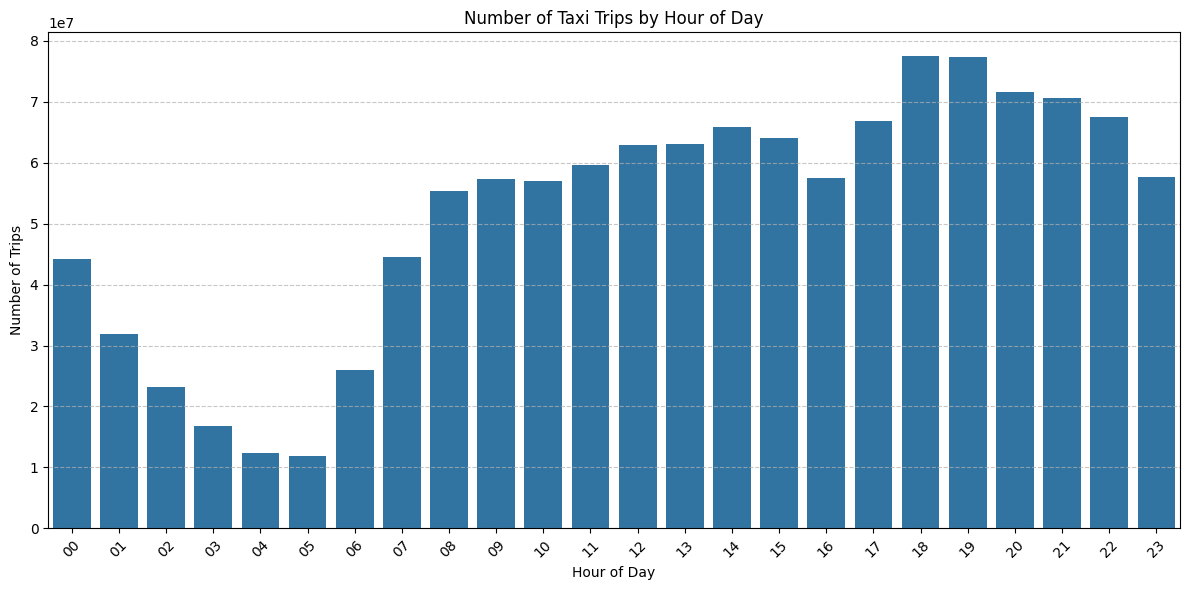

In [26]:
trips_by_hour = duckdb.sql(f"""
    SELECT
        strftime(tpep_pickup_datetime, '%H') AS hour_of_day,
        COUNT(*) AS trip_count
    FROM '{yellow_taxi_path}'
    GROUP BY 1
    ORDER BY 1;
""").df()

plt.figure(figsize=(12, 6))
sns.barplot(x='hour_of_day', y='trip_count', data=trips_by_hour)
plt.title('Number of Taxi Trips by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

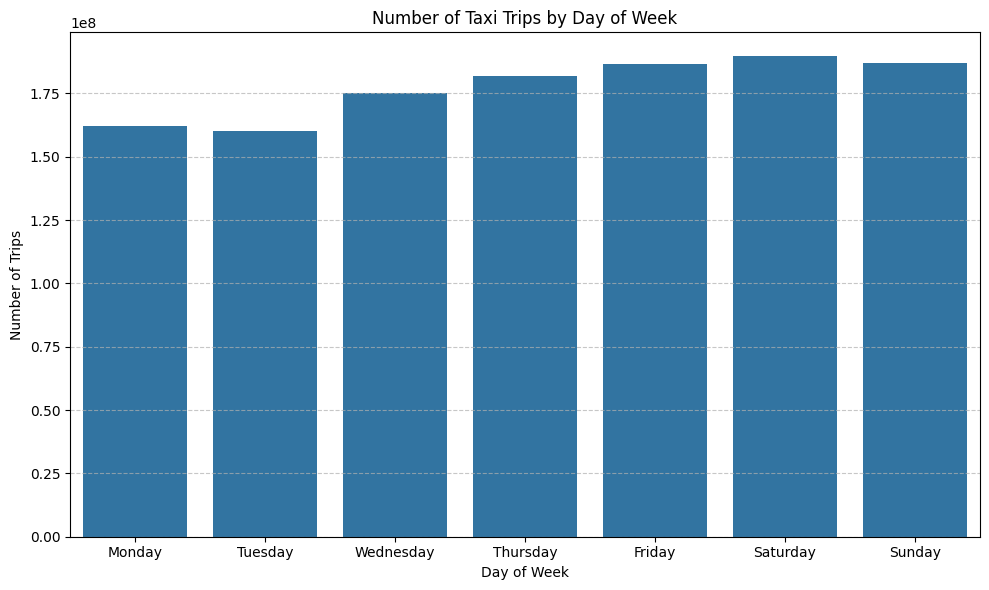

In [ ]:
trips_by_day = duckdb.sql(f"""
    SELECT
        strftime(tpep_pickup_datetime, '%w') AS day_of_week_num,
        COUNT(*) AS trip_count
    FROM '{yellow_taxi_path}'
    GROUP BY 1
    ORDER BY 1;
""").df()

day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
trips_by_day['day_of_week'] = trips_by_day['day_of_week_num'].map(lambda x: day_names[int(x)])

plt.figure(figsize=(10, 6))
sns.barplot(x='day_of_week', y='trip_count', data=trips_by_day, order=day_names)
plt.title('Number of Taxi Trips by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Trips')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


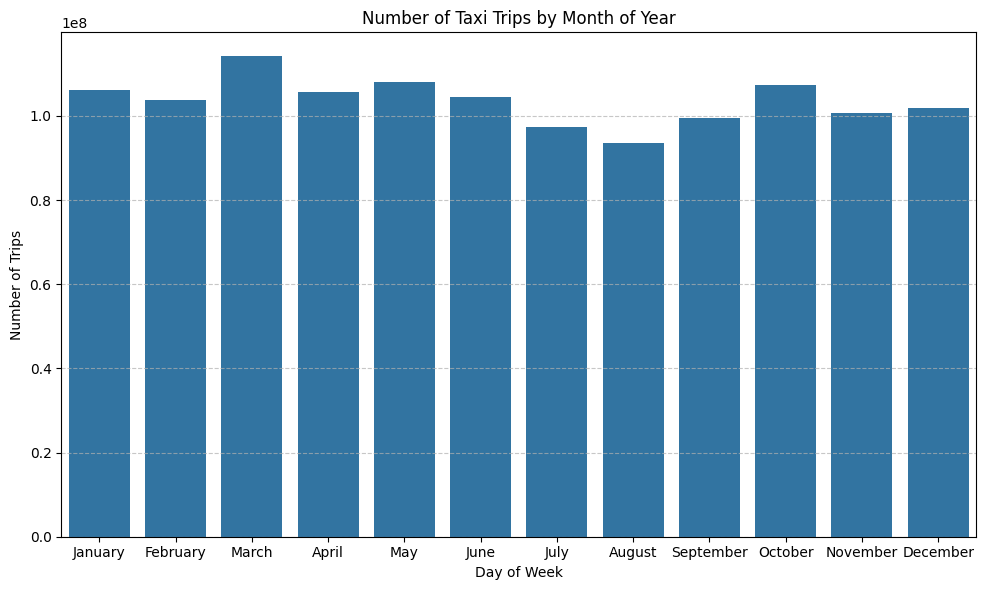

In [ ]:
trips_by_month = duckdb.sql(f"""
    SELECT
        strftime(tpep_pickup_datetime, '%m') AS month_num,
        COUNT(*) AS trip_count
    FROM '{yellow_taxi_path}'
    GROUP BY 1
    ORDER BY 1;
""").df()

month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
trips_by_month['month'] = trips_by_month['month_num'].map(lambda x: month_names[int(x) - 1])

plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='trip_count', data=trips_by_month, order=month_names)
plt.title('Number of Taxi Trips by Month of Year')
plt.xlabel('Day of Week')
plt.ylabel('Number of Trips')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


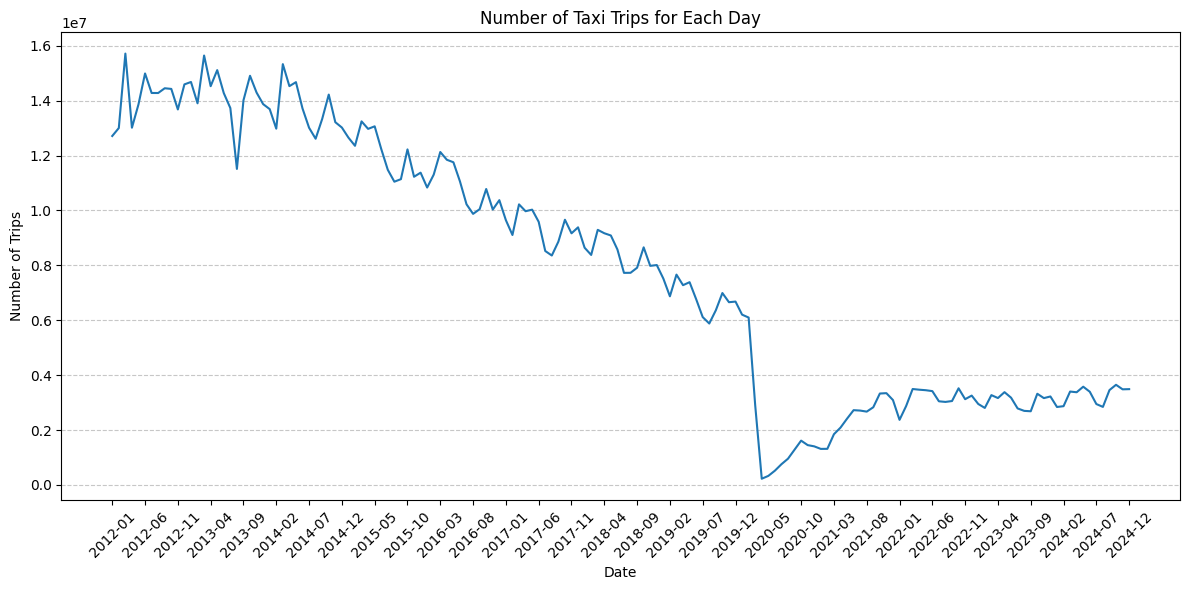

In [ ]:
count_by_date = duckdb.sql(f"""
    SELECT
        strftime(tpep_pickup_datetime, '%Y-%m') AS date,
        COUNT(*) AS trip_count
    FROM '{yellow_taxi_path}'
    GROUP BY 1
    ORDER BY 1;
""").df()

plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='trip_count', data=count_by_date)
plt.title('Number of Taxi Trips for Each Day')
plt.xlabel('Date')
plt.ylabel('Number of Trips')
plt.xticks(count_by_date['date'][0::5],rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [34]:
duckdb.sql(f"""
    SELECT
        strftime(tpep_pickup_datetime, '%H') AS hour_of_day,
        ROUND(AVG(fare_amount), 2) AS avg_fare,
        ROUND(AVG(total_amount), 2) AS avg_total_amount,
        ROUND(avg_total_amount - avg_fare, 2) AS avg_difference,
        ROUND(AVG(passenger_count), 2) AS avg_passenger_count
    FROM '{yellow_taxi_path}'
    GROUP BY 1
    ORDER BY 1;
""")

┌─────────────┬──────────┬──────────────────┬────────────────┬─────────────────────┐
│ hour_of_day │ avg_fare │ avg_total_amount │ avg_difference │ avg_passenger_count │
│   varchar   │  double  │      double      │     double     │       double        │
├─────────────┼──────────┼──────────────────┼────────────────┼─────────────────────┤
│ 00          │    13.29 │            16.85 │           3.56 │                1.69 │
│ 01          │    12.75 │            16.07 │           3.32 │                1.69 │
│ 02          │     12.5 │            15.66 │           3.16 │                 1.7 │
│ 03          │    13.04 │            16.19 │           3.15 │                 1.7 │
│ 04          │    15.17 │            18.75 │           3.58 │                1.68 │
│ 05          │    16.55 │            20.95 │            4.4 │                1.56 │
│ 06          │    13.44 │            16.82 │           3.38 │                1.52 │
│ 07          │    12.38 │            15.55 │           3.17 │   

## Spatial Analysis

In [16]:
duckdb.sql(f"""
    SELECT
        PULocationID,
        COUNT(*) AS pickup_count
    FROM '{yellow_taxi_path}'
    GROUP BY PULocationID
    ORDER BY pickup_count DESC
    LIMIT 10;
""")

┌──────────────┬──────────────┐
│ PULocationID │ pickup_count │
│    int64     │    int64     │
├──────────────┼──────────────┤
│          237 │     48582897 │
│          161 │     45464792 │
│          236 │     43739100 │
│          162 │     41703656 │
│          230 │     40488406 │
│          186 │     40099859 │
│          170 │     39747092 │
│          234 │     39309131 │
│           48 │     38824994 │
│           79 │     38013377 │
├──────────────┴──────────────┤
│ 10 rows           2 columns │
└─────────────────────────────┘

In [17]:
duckdb.sql(f"""
    SELECT
        DOLocationID,
        COUNT(*) AS pickup_count
    FROM '{yellow_taxi_path}'
    GROUP BY DOLocationID
    ORDER BY pickup_count DESC
    LIMIT 10;
""")

┌──────────────┬──────────────┐
│ DOLocationID │ pickup_count │
│    int64     │    int64     │
├──────────────┼──────────────┤
│          161 │     47349086 │
│          236 │     44402176 │
│          237 │     42855670 │
│          170 │     39334726 │
│          230 │     38713847 │
│          162 │     37687055 │
│          234 │     34437164 │
│           48 │     33263392 │
│          186 │     32360326 │
│          142 │     31521603 │
├──────────────┴──────────────┤
│ 10 rows           2 columns │
└─────────────────────────────┘

In [18]:
duckdb.sql(f"""
    SELECT
        PULocationID,
        ROUND(AVG(trip_distance), 2) AS avg_trip_distance,
        ROUND(AVG(fare_amount), 2) AS avg_fare_amount
    FROM '{yellow_taxi_path}'
    GROUP BY PULocationID
    ORDER BY avg_trip_distance DESC;
""")

┌──────────────┬───────────────────┬─────────────────┐
│ PULocationID │ avg_trip_distance │ avg_fare_amount │
│    int64     │      double       │     double      │
├──────────────┼───────────────────┼─────────────────┤
│           44 │             28.03 │           77.23 │
│            5 │             17.62 │           59.07 │
│          132 │             15.96 │           48.08 │
│           86 │             15.14 │           50.03 │
│           23 │             14.79 │           45.29 │
│          204 │             14.65 │            48.3 │
│          117 │             14.55 │           48.49 │
│           10 │             14.05 │           50.53 │
│          219 │             13.28 │           47.15 │
│          215 │             12.84 │           48.68 │
│           ·  │                ·  │              ·  │
│           ·  │                ·  │              ·  │
│           ·  │                ·  │              ·  │
│          143 │              2.26 │            10.7 │
│         

In [19]:
duckdb.sql(f"""
SELECT
    PULocationID,
    DOLocationID,
    COUNT(*) AS route_count,
    ROUND(AVG(trip_distance),2) AS avg_distance,
    ROUND(AVG(fare_amount),2) AS avg_fare,
    ROUND(AVG((EPOCH(tpep_dropoff_datetime) - EPOCH(tpep_pickup_datetime)) / 60),2) AS avg_duration_minutes
FROM '{yellow_taxi_path}'
GROUP BY PULocationID, DOLocationID
ORDER BY route_count DESC
LIMIT 15;
""")

┌──────────────┬──────────────┬─────────────┬──────────────┬──────────┬──────────────────────┐
│ PULocationID │ DOLocationID │ route_count │ avg_distance │ avg_fare │ avg_duration_minutes │
│    int64     │    int64     │    int64    │    double    │  double  │        double        │
├──────────────┼──────────────┼─────────────┼──────────────┼──────────┼──────────────────────┤
│          264 │          264 │    15834688 │         2.82 │    12.21 │                15.55 │
│          237 │          236 │     6366635 │         1.06 │     6.47 │                  7.2 │
│          236 │          237 │     5522063 │         1.07 │     7.21 │                 8.87 │
│          236 │          236 │     5074573 │         0.67 │     5.17 │                 5.37 │
│          237 │          237 │     4955381 │          0.7 │      5.6 │                 6.35 │
│          237 │          161 │     2977870 │         1.12 │     8.22 │                11.26 │
│          237 │          162 │     2950734 │     

## Other Analysis

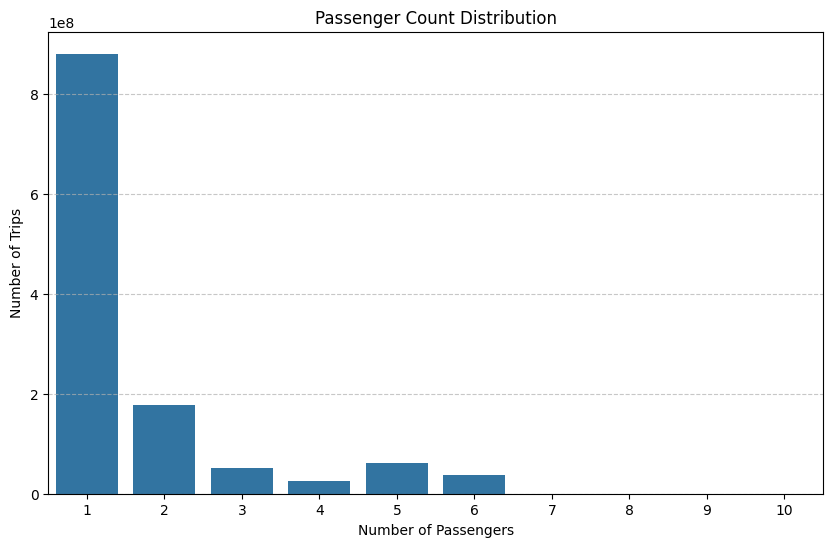

In [ ]:
# Passenger Count Distribution
passenger_count = duckdb.sql(f"""SELECT passenger_count, COUNT(*) as num_trips FROM '{yellow_taxi_path}'
                             WHERE passenger_count <= 10 GROUP BY passenger_count ORDER BY passenger_count""").fetchdf()
plt.figure(figsize=(10, 6))
sns.barplot(x='passenger_count', y='num_trips', data=passenger_count)
plt.title('Passenger Count Distribution')
plt.xlabel('Number of Passengers')
plt.ylabel('Number of Trips')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

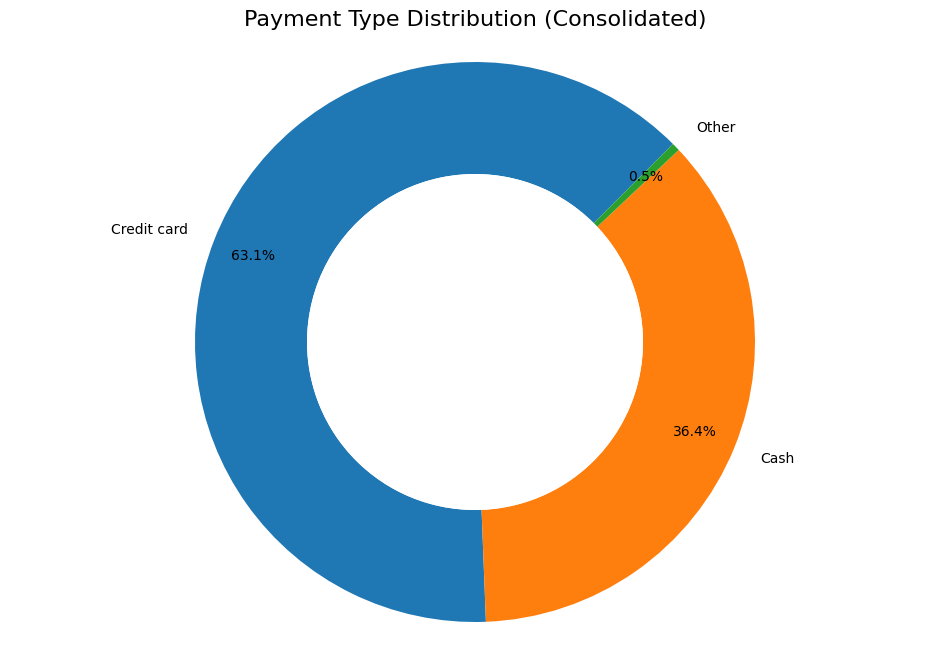

In [15]:
payment_type_map = {1: 'Credit card', 2: 'Cash', 3: 'Other', 4: 'Other', 5: 'Other', 6: 'Other'}
payment_type = duckdb.sql(f"SELECT payment_type, COUNT(*) as num_trips FROM '{yellow_taxi_path}' GROUP BY payment_type").fetchdf()


payment_type['payment_type_name'] = payment_type['payment_type'].map(payment_type_map)

payment_type_grouped = payment_type.groupby('payment_type_name')['num_trips'].sum().reset_index()
payment_type_grouped = payment_type_grouped.sort_values('num_trips', ascending=False)

plt.figure(figsize=(12, 8)) 

plt.pie(payment_type_grouped['num_trips'],
        labels=payment_type_grouped['payment_type_name'],
        autopct='%1.1f%%', 
        startangle=45,
        pctdistance=0.85, 
        wedgeprops=dict(width=0.4)) 

centre_circle = plt.Circle((0,0),0.60,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Payment Type Distribution (Consolidated)', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.



plt.show()


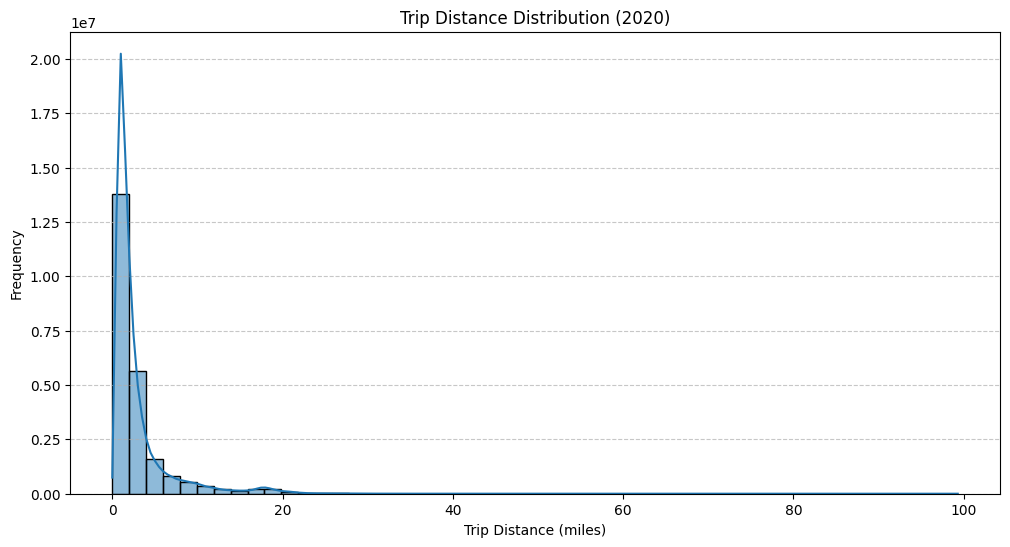

In [17]:
# Trip Distance Distribution
trip_distance = duckdb.sql(f"SELECT trip_distance FROM '{yellow_taxi_path}' WHERE year(tpep_pickup_datetime) == 2020").fetchdf()
plt.figure(figsize=(12, 6))
sns.histplot(trip_distance['trip_distance'], bins=50, kde=True)
plt.title('Trip Distance Distribution (2020)')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

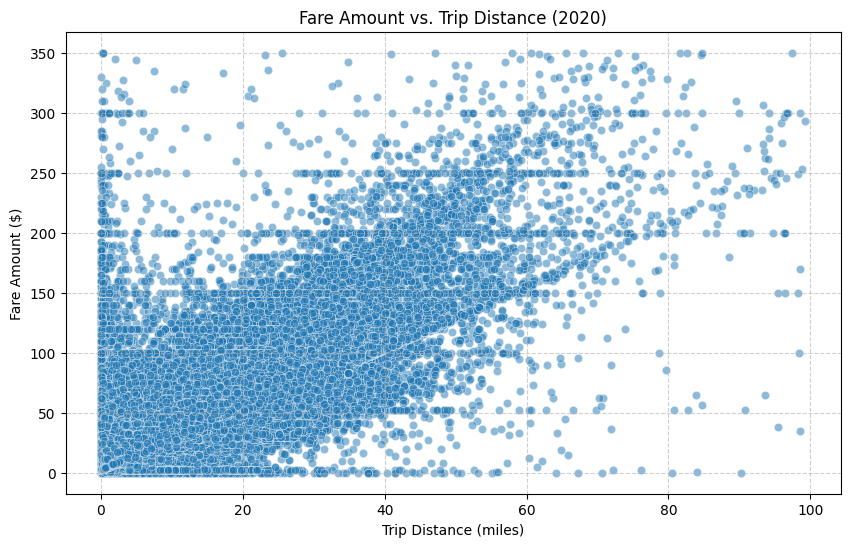

In [19]:
# Fare Amount vs. Trip Distance
fare_vs_distance = duckdb.sql(f"""
    SELECT trip_distance, fare_amount
    FROM '{yellow_taxi_path}'
    WHERE year(tpep_pickup_datetime) == 2020
""").fetchdf()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_distance', y='fare_amount', data=fare_vs_distance, alpha=0.5)
plt.title('Fare Amount vs. Trip Distance (2020)')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


# Green Taxi Data

In [20]:
green_taxi_path = "data/trip_record_data_filtered/green_taxi/*.parquet"

In [22]:
duckdb.sql(f"select * from '{green_taxi_path}'").columns

['lpep_pickup_datetime',
 'lpep_dropoff_datetime',
 'PULocationID',
 'DOLocationID',
 'passenger_count',
 'trip_distance',
 'payment_type',
 'fare_amount',
 'total_amount',
 'trip_type',
 'Year',
 '__null_dask_index__']

## Temporal Anlysis

In [23]:
duckdb.sql(f"""
SELECT
    MIN((EPOCH(lpep_dropoff_datetime) - EPOCH(lpep_pickup_datetime)) / 60) AS min_duration_minutes,
    MAX((EPOCH(lpep_dropoff_datetime) - EPOCH(lpep_pickup_datetime)) / 60) AS max_duration_minutes,
    AVG((EPOCH(lpep_dropoff_datetime) - EPOCH(lpep_pickup_datetime)) / 60) AS avg_duration_minutes,
    MEDIAN((EPOCH(lpep_dropoff_datetime) - EPOCH(lpep_pickup_datetime)) / 60) AS median_duration_minutes
FROM '{green_taxi_path}';
""")

┌──────────────────────┬──────────────────────┬──────────────────────┬─────────────────────────┐
│ min_duration_minutes │ max_duration_minutes │ avg_duration_minutes │ median_duration_minutes │
│        double        │        double        │        double        │         double          │
├──────────────────────┼──────────────────────┼──────────────────────┼─────────────────────────┤
│ 0.016666666666666666 │               8034.8 │   19.377352174304566 │                   10.65 │
└──────────────────────┴──────────────────────┴──────────────────────┴─────────────────────────┘

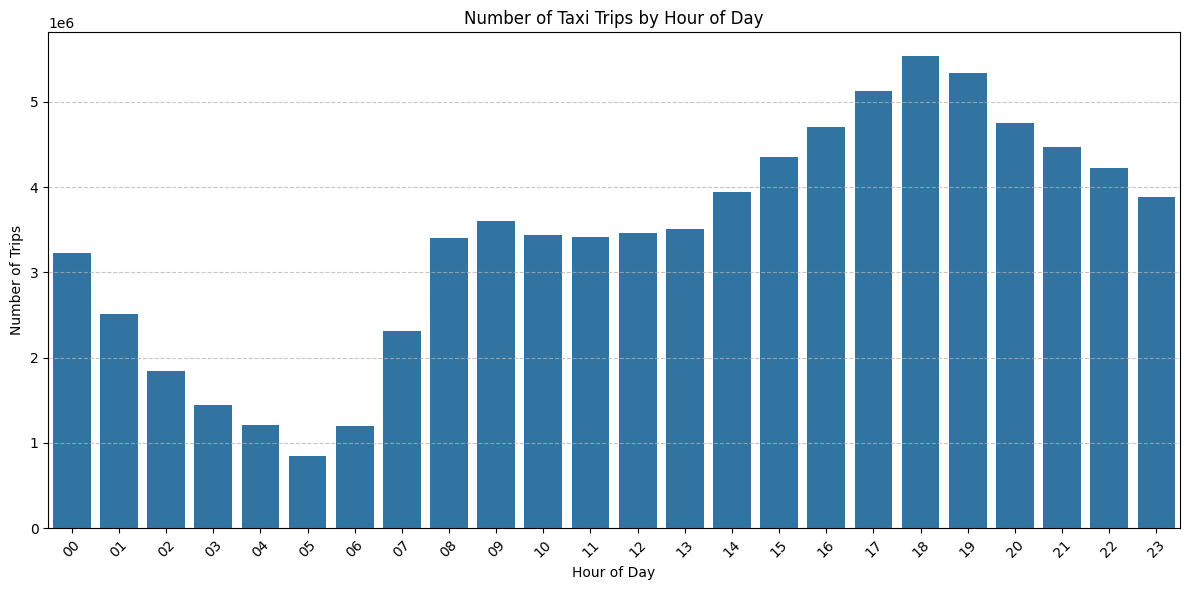

In [27]:
trips_by_hour = duckdb.sql(f"""
    SELECT
        strftime(lpep_pickup_datetime, '%H') AS hour_of_day,
        COUNT(*) AS trip_count
    FROM '{green_taxi_path}'
    GROUP BY 1
    ORDER BY 1;
""").df()

plt.figure(figsize=(12, 6))
sns.barplot(x='hour_of_day', y='trip_count', data=trips_by_hour)
plt.title('Number of Taxi Trips by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

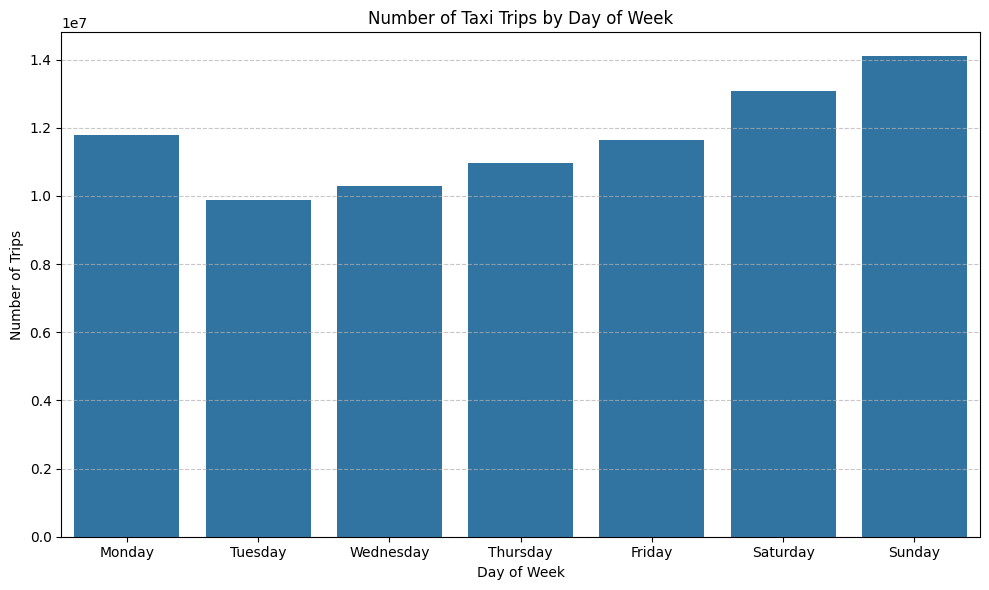

In [29]:
trips_by_day = duckdb.sql(f"""
    SELECT
        strftime(lpep_pickup_datetime, '%w') AS day_of_week_num,
        COUNT(*) AS trip_count
    FROM '{green_taxi_path}'
    GROUP BY 1
    ORDER BY 1;
""").df()

day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
trips_by_day['day_of_week'] = trips_by_day['day_of_week_num'].map(lambda x: day_names[int(x)])

plt.figure(figsize=(10, 6))
sns.barplot(x='day_of_week', y='trip_count', data=trips_by_day, order=day_names)
plt.title('Number of Taxi Trips by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Trips')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


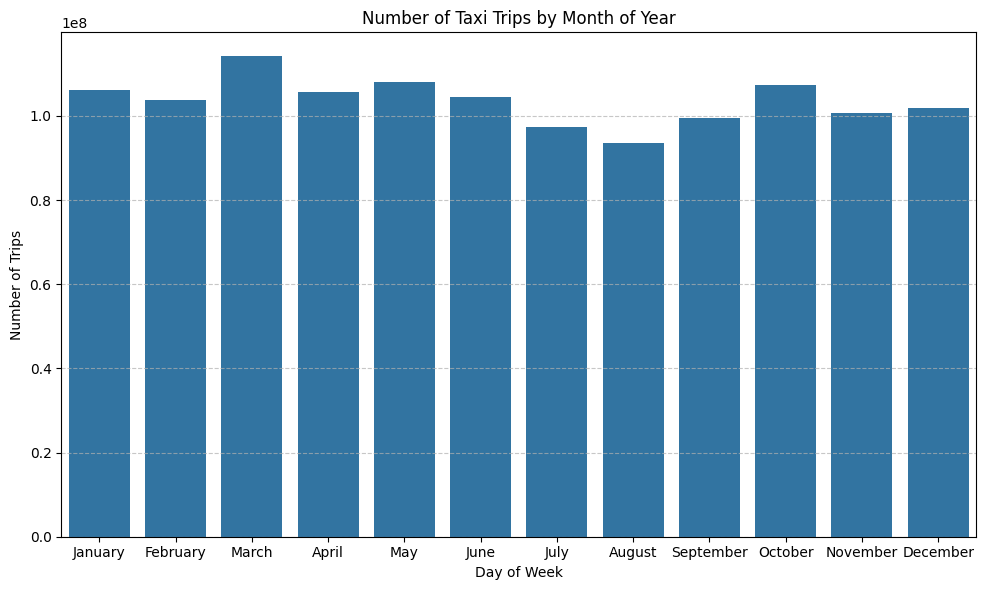

In [30]:
trips_by_month = duckdb.sql(f"""
    SELECT
        strftime(tpep_pickup_datetime, '%m') AS month_num,
        COUNT(*) AS trip_count
    FROM '{yellow_taxi_path}'
    GROUP BY 1
    ORDER BY 1;
""").df()

month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
trips_by_month['month'] = trips_by_month['month_num'].map(lambda x: month_names[int(x) - 1])

plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='trip_count', data=trips_by_month, order=month_names)
plt.title('Number of Taxi Trips by Month of Year')
plt.xlabel('Day of Week')
plt.ylabel('Number of Trips')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


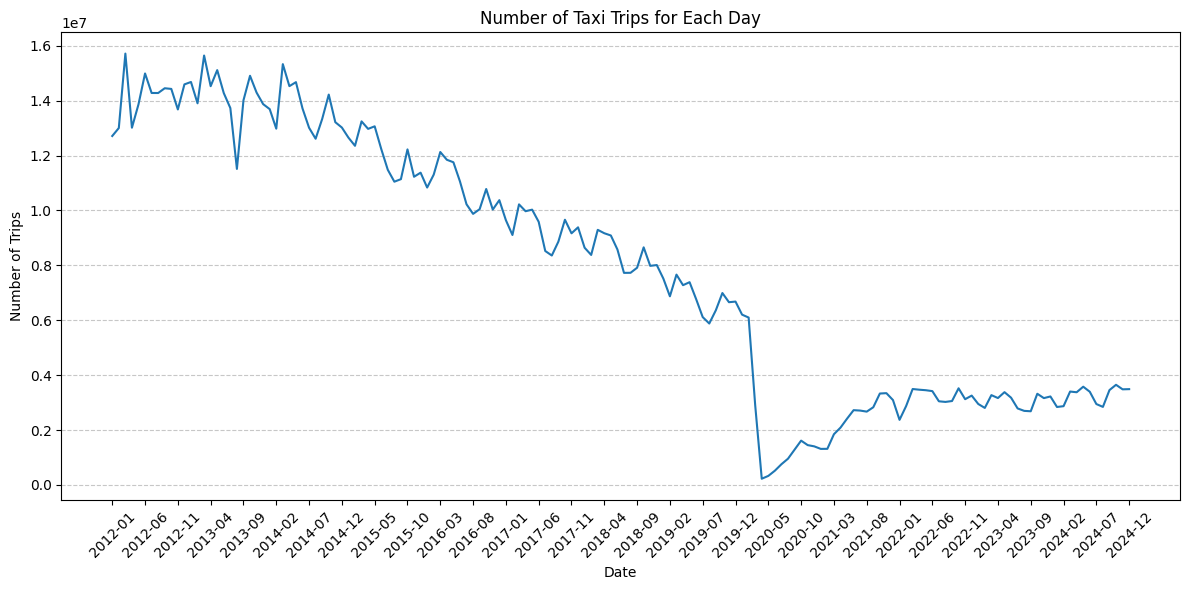

In [31]:
count_by_date = duckdb.sql(f"""
    SELECT
        strftime(tpep_pickup_datetime, '%Y-%m') AS date,
        COUNT(*) AS trip_count
    FROM '{yellow_taxi_path}'
    GROUP BY 1
    ORDER BY 1;
""").df()

plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='trip_count', data=count_by_date)
plt.title('Number of Taxi Trips for Each Day')
plt.xlabel('Date')
plt.ylabel('Number of Trips')
plt.xticks(count_by_date['date'][0::5],rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [35]:
duckdb.sql(f"""
    SELECT
        strftime(lpep_pickup_datetime, '%H') AS hour_of_day,
        ROUND(AVG(fare_amount), 2) AS avg_fare,
        ROUND(AVG(total_amount), 2) AS avg_total_amount,
        ROUND(avg_total_amount - avg_fare, 2) AS avg_difference,
        ROUND(AVG(passenger_count), 2) AS avg_passenger_count
    FROM '{green_taxi_path}'
    GROUP BY 1
    ORDER BY 1;
""")

┌─────────────┬──────────┬──────────────────┬────────────────┬─────────────────────┐
│ hour_of_day │ avg_fare │ avg_total_amount │ avg_difference │ avg_passenger_count │
│   varchar   │  double  │      double      │     double     │       double        │
├─────────────┼──────────┼──────────────────┼────────────────┼─────────────────────┤
│ 00          │    12.07 │            14.92 │           2.85 │                1.41 │
│ 01          │    11.89 │            14.37 │           2.48 │                1.41 │
│ 02          │    12.06 │            14.52 │           2.46 │                1.43 │
│ 03          │     12.6 │            15.06 │           2.46 │                1.44 │
│ 04          │    13.73 │            16.21 │           2.48 │                1.44 │
│ 05          │    16.17 │            19.17 │            3.0 │                1.38 │
│ 06          │    16.77 │            19.56 │           2.79 │                1.31 │
│ 07          │    14.66 │            17.17 │           2.51 │   

## Spatial Analysis

In [36]:
duckdb.sql(f"""
    SELECT
        PULocationID,
        COUNT(*) AS pickup_count
    FROM '{green_taxi_path}'
    GROUP BY PULocationID
    ORDER BY pickup_count DESC
    LIMIT 10;
""")

┌──────────────┬──────────────┐
│ PULocationID │ pickup_count │
│    int64     │    int64     │
├──────────────┼──────────────┤
│           74 │      4968519 │
│           41 │      4296050 │
│           75 │      4263081 │
│            7 │      3788161 │
│           82 │      3269545 │
│          166 │      3208484 │
│          255 │      3162686 │
│           42 │      2813261 │
│          181 │      2422402 │
│          129 │      2269545 │
├──────────────┴──────────────┤
│ 10 rows           2 columns │
└─────────────────────────────┘

In [37]:
duckdb.sql(f"""
    SELECT
        DOLocationID,
        COUNT(*) AS pickup_count
    FROM '{green_taxi_path}'
    GROUP BY DOLocationID
    ORDER BY pickup_count DESC
    LIMIT 10;
""")

┌──────────────┬──────────────┐
│ DOLocationID │ pickup_count │
│    int64     │    int64     │
├──────────────┼──────────────┤
│           74 │      2619583 │
│           42 │      2572163 │
│            7 │      2298345 │
│           41 │      2274725 │
│          129 │      2129809 │
│          181 │      1764336 │
│           75 │      1674190 │
│          166 │      1481486 │
│           82 │      1476706 │
│           61 │      1414092 │
├──────────────┴──────────────┤
│ 10 rows           2 columns │
└─────────────────────────────┘

In [38]:
duckdb.sql(f"""
    SELECT
        PULocationID,
        ROUND(AVG(trip_distance), 2) AS avg_trip_distance,
        ROUND(AVG(fare_amount), 2) AS avg_fare_amount
    FROM '{green_taxi_path}'
    GROUP BY PULocationID
    ORDER BY avg_trip_distance DESC;
""")

┌──────────────┬───────────────────┬─────────────────┐
│ PULocationID │ avg_trip_distance │ avg_fare_amount │
│    int64     │      double       │     double      │
├──────────────┼───────────────────┼─────────────────┤
│            5 │             22.39 │           68.11 │
│           44 │             21.23 │           65.06 │
│          204 │             21.07 │           60.63 │
│           23 │             20.38 │           61.88 │
│           84 │             18.87 │            56.1 │
│           86 │              14.7 │           49.31 │
│          117 │             14.69 │           48.86 │
│           99 │             14.38 │            49.7 │
│          176 │             14.02 │            47.4 │
│          201 │             13.96 │           45.56 │
│            · │                ·  │             ·   │
│            · │                ·  │             ·   │
│            · │                ·  │             ·   │
│           75 │              2.48 │           11.28 │
│         

In [60]:
duckdb.sql(f"""
SELECT
    PULocationID,
    DOLocationID,
    COUNT(*) AS route_count,
    ROUND(AVG(trip_distance),2) AS avg_distance,
    ROUND(AVG(fare_amount),2) AS avg_fare,
    ROUND(AVG((EPOCH(lpep_dropoff_datetime) - EPOCH(lpep_pickup_datetime)) / 60),2) AS avg_duration_minutes
FROM '{green_taxi_path}'
GROUP BY PULocationID, DOLocationID
ORDER BY route_count DESC
LIMIT 15;
""")

┌──────────────┬──────────────┬─────────────┬──────────────┬──────────┬──────────────────────┐
│ PULocationID │ DOLocationID │ route_count │ avg_distance │ avg_fare │ avg_duration_minutes │
│    int64     │    int64     │    int64    │    double    │  double  │        double        │
├──────────────┼──────────────┼─────────────┼──────────────┼──────────┼──────────────────────┤
│            7 │            7 │      976323 │         0.86 │     5.71 │                11.36 │
│           75 │           74 │      745258 │         1.15 │     6.26 │                 9.39 │
│           41 │           42 │      702332 │         1.12 │     6.41 │                11.18 │
│          129 │          129 │      619463 │         1.05 │     6.76 │                12.72 │
│           74 │           75 │      603468 │         1.21 │     7.12 │                11.43 │
│           95 │           95 │      584938 │         1.03 │     6.55 │                12.96 │
│           82 │          129 │      571944 │     

## Other Analysis

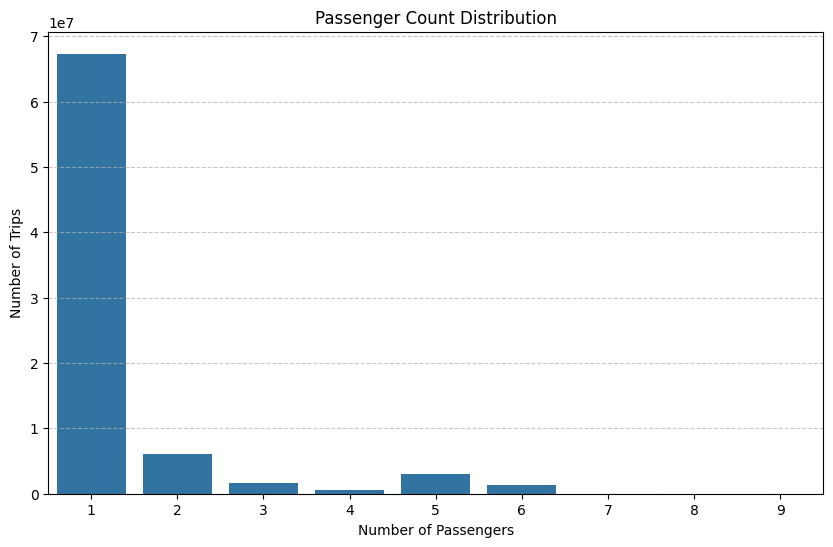

In [39]:
# Passenger Count Distribution
passenger_count = duckdb.sql(f"""SELECT passenger_count, COUNT(*) as num_trips FROM '{green_taxi_path}'
                             WHERE passenger_count <= 10 GROUP BY passenger_count ORDER BY passenger_count""").fetchdf()
plt.figure(figsize=(10, 6))
sns.barplot(x='passenger_count', y='num_trips', data=passenger_count)
plt.title('Passenger Count Distribution')
plt.xlabel('Number of Passengers')
plt.ylabel('Number of Trips')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

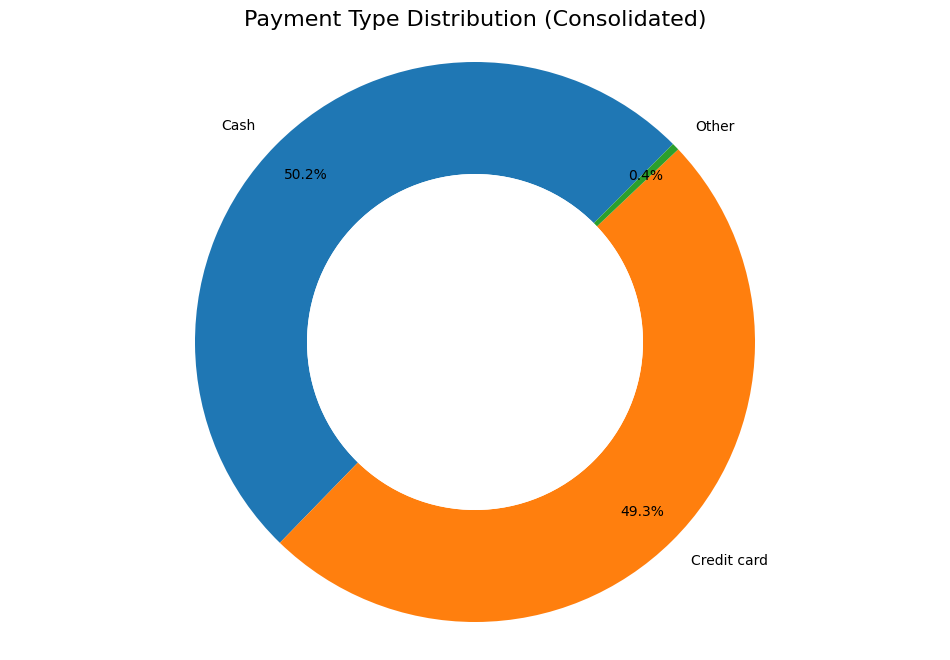

In [41]:
payment_type_map = {1: 'Credit card', 2: 'Cash', 3: 'Other', 4: 'Other', 5: 'Other', 6: 'Other'}
payment_type = duckdb.sql(f"SELECT payment_type, COUNT(*) as num_trips FROM '{green_taxi_path}' GROUP BY payment_type").fetchdf()


payment_type['payment_type_name'] = payment_type['payment_type'].map(payment_type_map)

payment_type_grouped = payment_type.groupby('payment_type_name')['num_trips'].sum().reset_index()
payment_type_grouped = payment_type_grouped.sort_values('num_trips', ascending=False)

plt.figure(figsize=(12, 8)) 

plt.pie(payment_type_grouped['num_trips'],
        labels=payment_type_grouped['payment_type_name'],
        autopct='%1.1f%%', 
        startangle=45,
        pctdistance=0.85, 
        wedgeprops=dict(width=0.4)) 

centre_circle = plt.Circle((0,0),0.60,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Payment Type Distribution (Consolidated)', fontsize=16)
plt.axis('equal') 

plt.show()

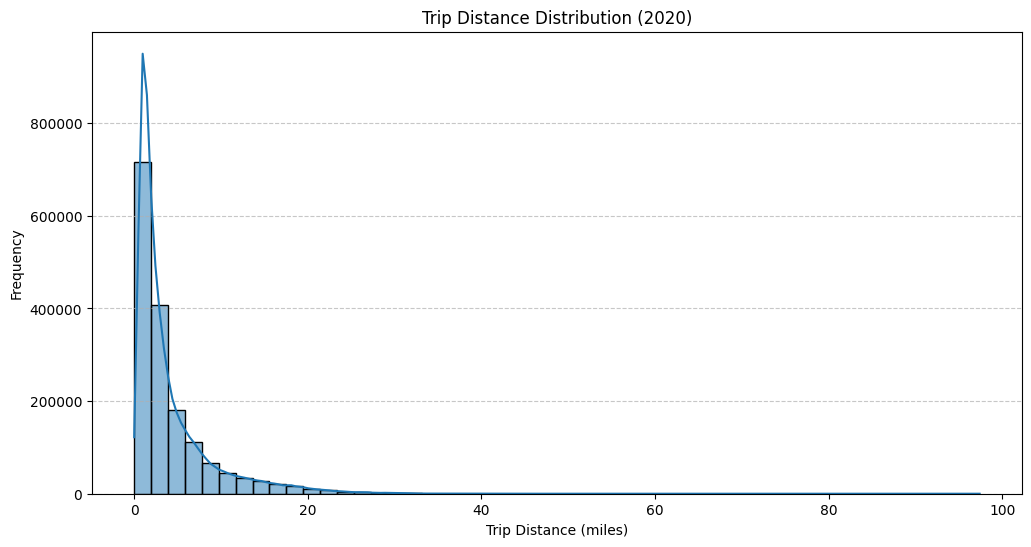

In [43]:
# Trip Distance Distribution
trip_distance = duckdb.sql(f"SELECT trip_distance FROM '{green_taxi_path}' WHERE year(lpep_pickup_datetime) == 2020").fetchdf()
plt.figure(figsize=(12, 6))
sns.histplot(trip_distance['trip_distance'], bins=50, kde=True)
plt.title('Trip Distance Distribution (2020)')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

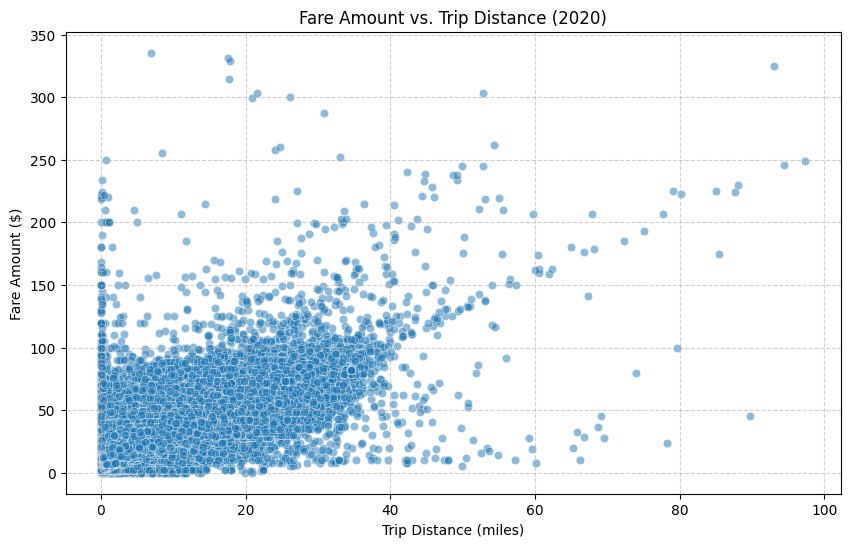

In [44]:
# Fare Amount vs. Trip Distance
fare_vs_distance = duckdb.sql(f"""
    SELECT trip_distance, fare_amount
    FROM '{green_taxi_path}'
    WHERE year(lpep_pickup_datetime) == 2020
""").fetchdf()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_distance', y='fare_amount', data=fare_vs_distance, alpha=0.5)
plt.title('Fare Amount vs. Trip Distance (2020)')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


# For Hire Taxi Data

In [45]:
for_hire_taxi_path = "data/trip_record_data_filtered/for_hire/*.parquet"

In [46]:
duckdb.sql(f"select * from '{for_hire_taxi_path}'").columns

['dispatching_base_num',
 'pickup_datetime',
 'dropOff_datetime',
 'PUlocationID',
 'DOlocationID',
 'SR_Flag',
 'Affiliated_base_number',
 'Year',
 '__null_dask_index__']

## Temporal Analysis

In [47]:
duckdb.sql(f"""
SELECT
    MIN((EPOCH(dropOff_datetime) - EPOCH(pickup_datetime)) / 60) AS min_duration_minutes,
    MAX((EPOCH(dropOff_datetime) - EPOCH(pickup_datetime)) / 60) AS max_duration_minutes,
    AVG((EPOCH(dropOff_datetime) - EPOCH(pickup_datetime)) / 60) AS avg_duration_minutes,
    MEDIAN((EPOCH(dropOff_datetime) - EPOCH(pickup_datetime)) / 60) AS median_duration_minutes
FROM '{for_hire_taxi_path}';
""")

┌──────────────────────┬──────────────────────┬──────────────────────┬─────────────────────────┐
│ min_duration_minutes │ max_duration_minutes │ avg_duration_minutes │ median_duration_minutes │
│        double        │        double        │        double        │         double          │
├──────────────────────┼──────────────────────┼──────────────────────┼─────────────────────────┤
│ 0.016666666666666666 │   1673570884.3166666 │    65.57043311150727 │                    16.5 │
└──────────────────────┴──────────────────────┴──────────────────────┴─────────────────────────┘

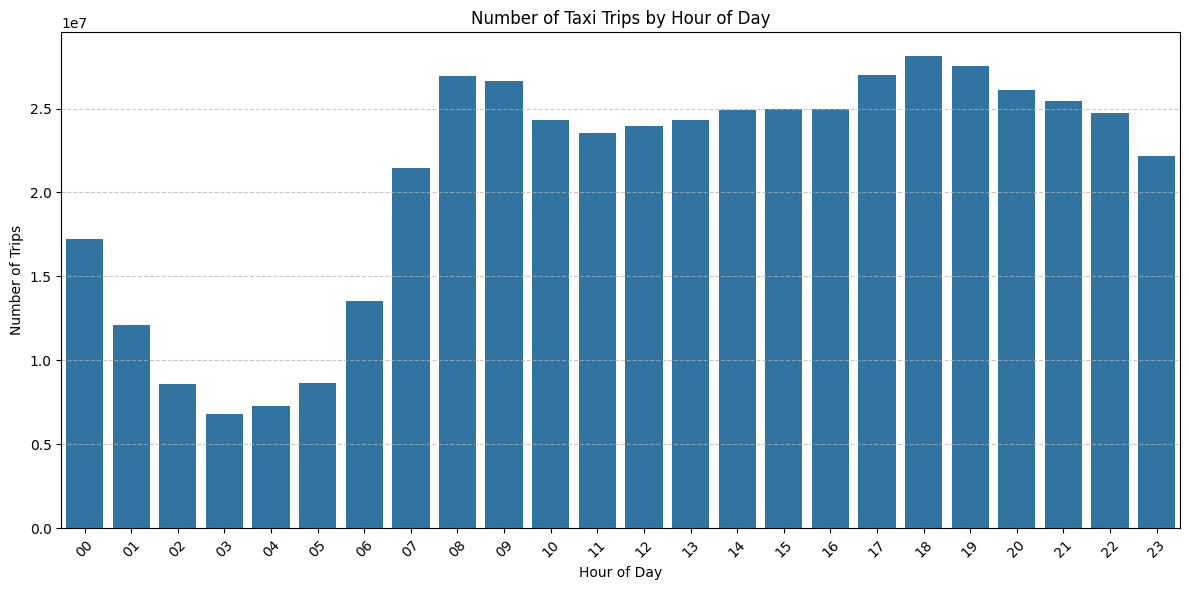

In [48]:
trips_by_hour = duckdb.sql(f"""
    SELECT
        strftime(pickup_datetime, '%H') AS hour_of_day,
        COUNT(*) AS trip_count
    FROM '{for_hire_taxi_path}'
    GROUP BY 1
    ORDER BY 1;
""").df()

plt.figure(figsize=(12, 6))
sns.barplot(x='hour_of_day', y='trip_count', data=trips_by_hour)
plt.title('Number of Taxi Trips by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

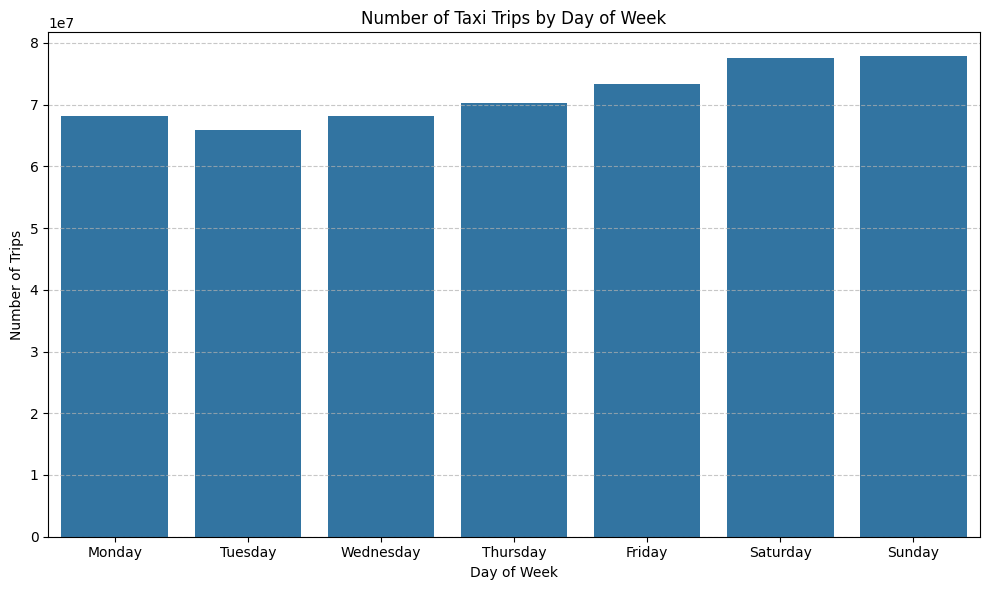

In [49]:
trips_by_day = duckdb.sql(f"""
    SELECT
        strftime(pickup_datetime, '%w') AS day_of_week_num,
        COUNT(*) AS trip_count
    FROM '{for_hire_taxi_path}'
    GROUP BY 1
    ORDER BY 1;
""").df()

day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
trips_by_day['day_of_week'] = trips_by_day['day_of_week_num'].map(lambda x: day_names[int(x)])

plt.figure(figsize=(10, 6))
sns.barplot(x='day_of_week', y='trip_count', data=trips_by_day, order=day_names)
plt.title('Number of Taxi Trips by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Trips')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


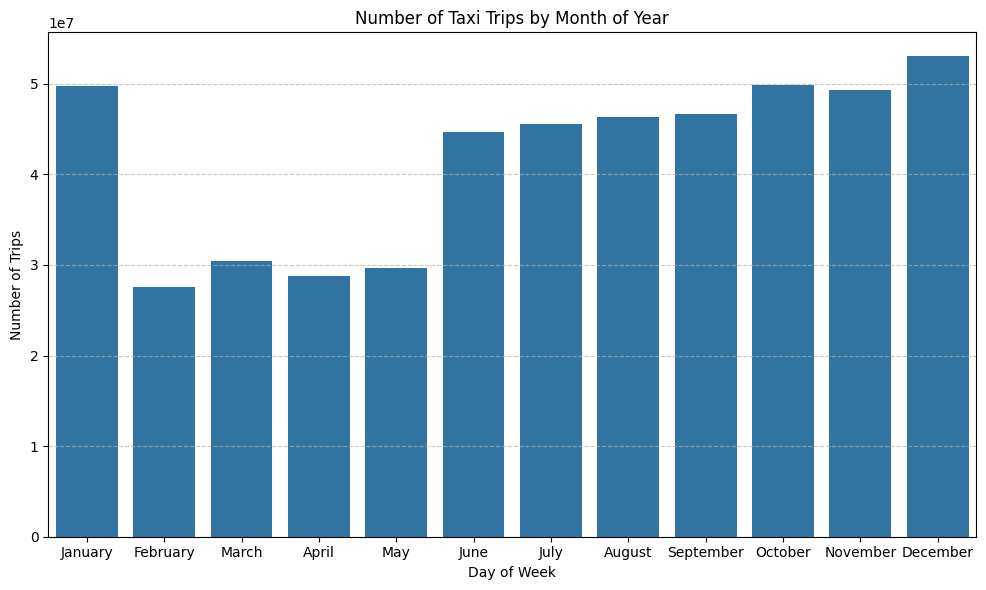

In [50]:
trips_by_month = duckdb.sql(f"""
    SELECT
        strftime(pickup_datetime, '%m') AS month_num,
        COUNT(*) AS trip_count
    FROM '{for_hire_taxi_path}'
    GROUP BY 1
    ORDER BY 1;
""").df()

month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
trips_by_month['month'] = trips_by_month['month_num'].map(lambda x: month_names[int(x) - 1])

plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='trip_count', data=trips_by_month, order=month_names)
plt.title('Number of Taxi Trips by Month of Year')
plt.xlabel('Day of Week')
plt.ylabel('Number of Trips')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


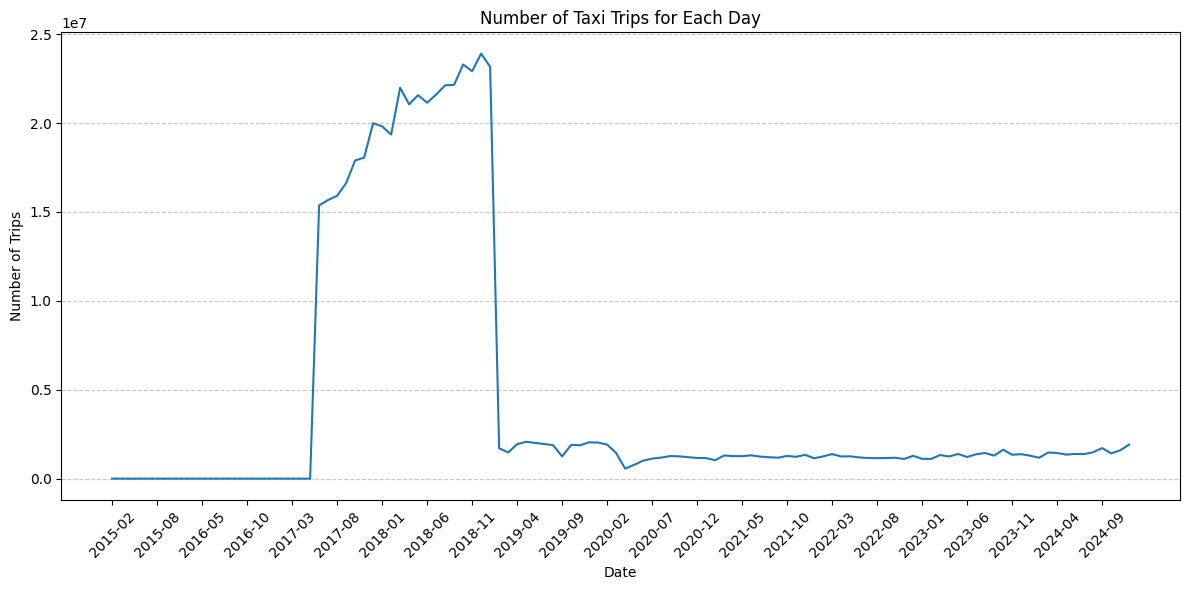

In [51]:
count_by_date = duckdb.sql(f"""
    SELECT
        strftime(pickup_datetime, '%Y-%m') AS date,
        COUNT(*) AS trip_count
    FROM '{for_hire_taxi_path}'
    GROUP BY 1
    ORDER BY 1;
""").df()

plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='trip_count', data=count_by_date)
plt.title('Number of Taxi Trips for Each Day')
plt.xlabel('Date')
plt.ylabel('Number of Trips')
plt.xticks(count_by_date['date'][0::5],rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Spatial Analysis

In [52]:
duckdb.sql(f"""
    SELECT
        PULocationID,
        COUNT(*) AS pickup_count
    FROM '{for_hire_taxi_path}'
    GROUP BY PULocationID
    ORDER BY pickup_count DESC
    LIMIT 10;
""")

┌──────────────┬──────────────┐
│ PUlocationID │ pickup_count │
│    double    │    int64     │
├──────────────┼──────────────┤
│         NULL │    115679322 │
│        264.0 │     25435192 │
│         79.0 │      6086590 │
│        132.0 │      5646341 │
│        161.0 │      5633423 │
│         48.0 │      5277007 │
│         61.0 │      5254502 │
│        234.0 │      5169683 │
│        138.0 │      4996066 │
│        231.0 │      4571465 │
├──────────────┴──────────────┤
│ 10 rows           2 columns │
└─────────────────────────────┘

In [54]:
duckdb.sql(f"""
    SELECT
        DOLocationID,
        COUNT(*) AS pickup_count
    FROM '{for_hire_taxi_path}'
    GROUP BY DOLocationID
    ORDER BY pickup_count DESC
    LIMIT 10;
""")

┌──────────────┬──────────────┐
│ DOlocationID │ pickup_count │
│    double    │    int64     │
├──────────────┼──────────────┤
│        265.0 │     49300837 │
│         NULL │     43530709 │
│        132.0 │      7492353 │
│        138.0 │      6971286 │
│         61.0 │      6273403 │
│        264.0 │      5777655 │
│        161.0 │      5365804 │
│         79.0 │      5150176 │
│         76.0 │      4781339 │
│        234.0 │      4571319 │
├──────────────┴──────────────┤
│ 10 rows           2 columns │
└─────────────────────────────┘

In [62]:
duckdb.sql(f"""
SELECT
    PULocationID,
    DOLocationID,
    COUNT(*) AS route_count,
    ROUND(AVG((EPOCH(dropoff_datetime) - EPOCH(pickup_datetime)) / 60),2) AS avg_duration_minutes
FROM '{for_hire_taxi_path}'
WHERE PUlocationID IS NOT NULL AND DOLocationId IS NOT NULL
GROUP BY PULocationID, DOLocationID
ORDER BY route_count DESC
LIMIT 15;
""")

┌──────────────┬──────────────┬─────────────┬──────────────────────┐
│ PUlocationID │ DOlocationID │ route_count │ avg_duration_minutes │
│    double    │    double    │    int64    │        double        │
├──────────────┼──────────────┼─────────────┼──────────────────────┤
│        264.0 │        265.0 │     8801645 │               129.68 │
│        264.0 │        264.0 │     5641845 │               378.33 │
│        132.0 │        265.0 │     1051704 │                56.11 │
│        265.0 │        265.0 │      924480 │              3577.31 │
│        138.0 │        265.0 │      720064 │                51.58 │
│         76.0 │         76.0 │      667301 │                 8.71 │
│         61.0 │         61.0 │      584463 │                10.67 │
│        129.0 │        129.0 │      546533 │                12.65 │
│         39.0 │         39.0 │      511621 │                  7.6 │
│          7.0 │          7.0 │      505189 │                 8.35 │
│         26.0 │         26.0 │   

# High Volume Taxi Data

In [3]:
high_volume_taxi_path = "data/trip_record_data_filtered/high_volume/*.parquet"

In [4]:
duckdb.sql(f"select * from '{high_volume_taxi_path}'").columns

['hvfhs_license_num',
 'request_datetime',
 'on_scene_datetime',
 'pickup_datetime',
 'dropoff_datetime',
 'PULocationID',
 'DOLocationID',
 'trip_miles',
 'trip_time',
 'tolls',
 'bcf',
 'sales_tax',
 'congestion_surcharge',
 'airport_fee',
 'base_passenger_fare',
 'tips',
 'Year',
 '__null_dask_index__']

## Temporal Analysis

In [5]:
duckdb.sql(f"""
SELECT
    MIN((EPOCH(dropoff_datetime) - EPOCH(pickup_datetime)) / 60) AS min_duration_minutes,
    MAX((EPOCH(dropoff_datetime) - EPOCH(pickup_datetime)) / 60) AS max_duration_minutes,
    AVG((EPOCH(dropoff_datetime) - EPOCH(pickup_datetime)) / 60) AS avg_duration_minutes,
    MEDIAN((EPOCH(dropoff_datetime) - EPOCH(pickup_datetime)) / 60) AS median_duration_minutes
FROM '{high_volume_taxi_path}';
""")

┌──────────────────────┬──────────────────────┬──────────────────────┬─────────────────────────┐
│ min_duration_minutes │ max_duration_minutes │ avg_duration_minutes │ median_duration_minutes │
│        double        │        double        │        double        │         double          │
├──────────────────────┼──────────────────────┼──────────────────────┼─────────────────────────┤
│ 0.016666666666666666 │   1580.8833333333334 │   19.488136552028667 │                   15.85 │
└──────────────────────┴──────────────────────┴──────────────────────┴─────────────────────────┘

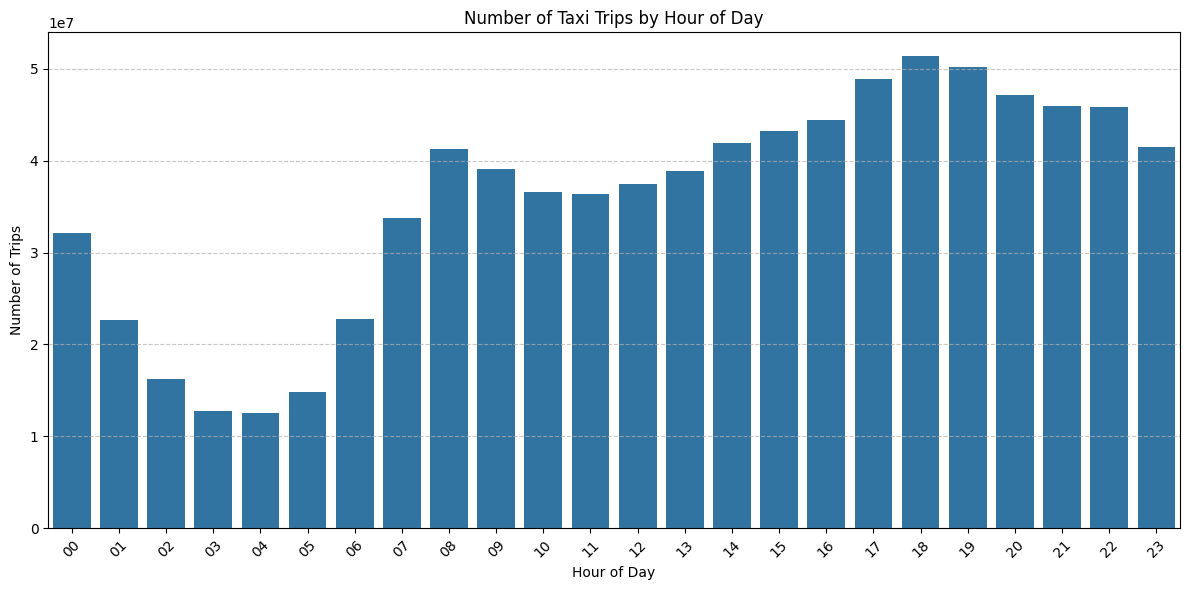

In [6]:
trips_by_hour = duckdb.sql(f"""
    SELECT
        strftime(pickup_datetime, '%H') AS hour_of_day,
        COUNT(*) AS trip_count
    FROM '{high_volume_taxi_path}'
    GROUP BY 1
    ORDER BY 1;
""").df()

plt.figure(figsize=(12, 6))
sns.barplot(x='hour_of_day', y='trip_count', data=trips_by_hour)
plt.title('Number of Taxi Trips by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

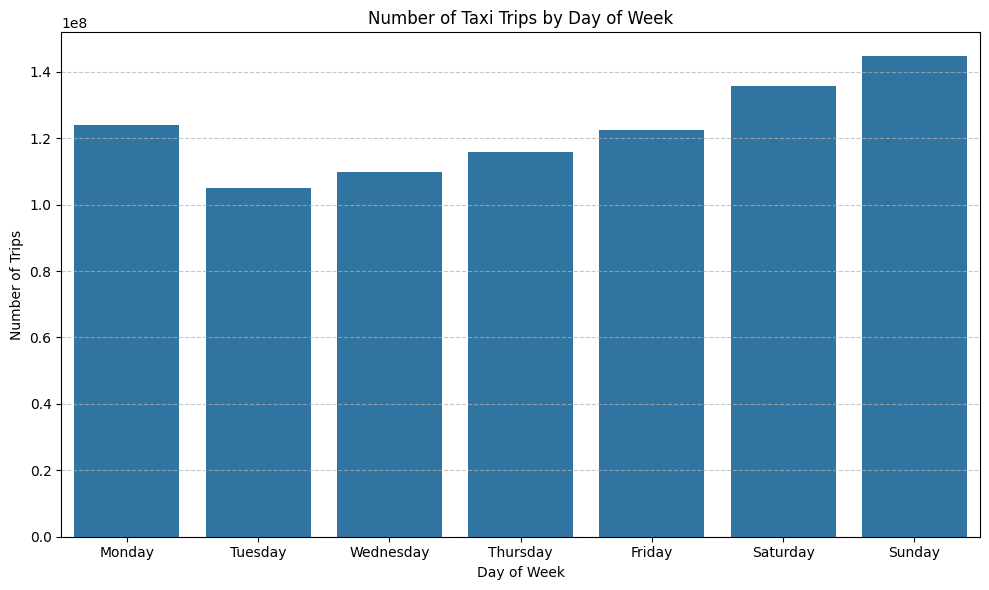

In [7]:
trips_by_day = duckdb.sql(f"""
    SELECT
        strftime(pickup_datetime, '%w') AS day_of_week_num,
        COUNT(*) AS trip_count
    FROM '{high_volume_taxi_path}'
    GROUP BY 1
    ORDER BY 1;
""").df()

day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
trips_by_day['day_of_week'] = trips_by_day['day_of_week_num'].map(lambda x: day_names[int(x)])

plt.figure(figsize=(10, 6))
sns.barplot(x='day_of_week', y='trip_count', data=trips_by_day, order=day_names)
plt.title('Number of Taxi Trips by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Trips')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


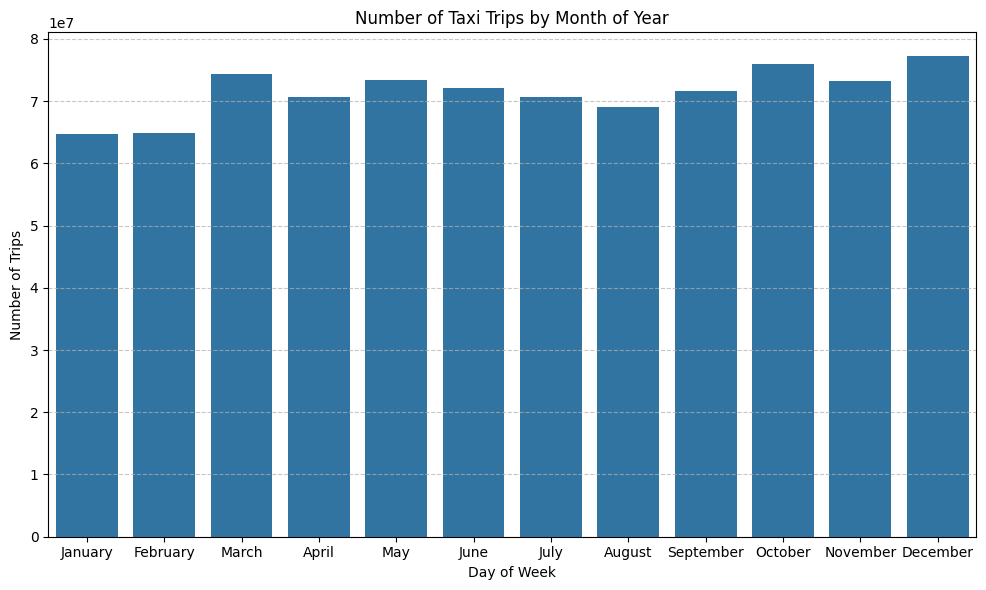

In [8]:
trips_by_month = duckdb.sql(f"""
    SELECT
        strftime(pickup_datetime, '%m') AS month_num,
        COUNT(*) AS trip_count
    FROM '{high_volume_taxi_path}'
    GROUP BY 1
    ORDER BY 1;
""").df()

month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
trips_by_month['month'] = trips_by_month['month_num'].map(lambda x: month_names[int(x) - 1])

plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='trip_count', data=trips_by_month, order=month_names)
plt.title('Number of Taxi Trips by Month of Year')
plt.xlabel('Day of Week')
plt.ylabel('Number of Trips')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


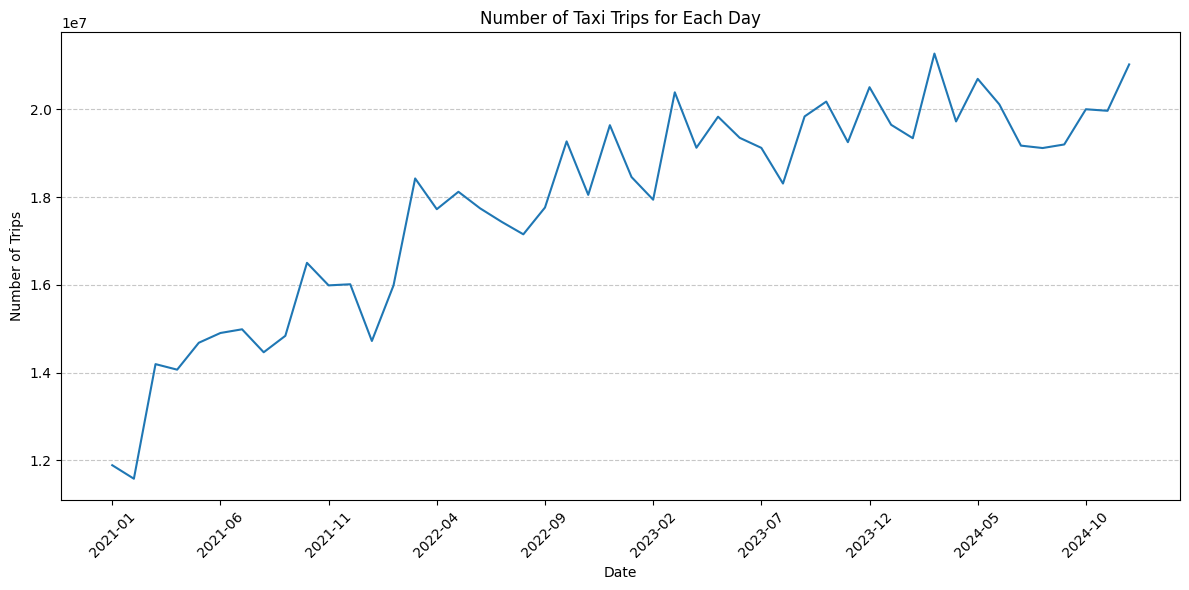

In [9]:
count_by_date = duckdb.sql(f"""
    SELECT
        strftime(pickup_datetime, '%Y-%m') AS date,
        COUNT(*) AS trip_count
    FROM '{high_volume_taxi_path}'
    GROUP BY 1
    ORDER BY 1;
""").df()

plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='trip_count', data=count_by_date)
plt.title('Number of Taxi Trips for Each Day')
plt.xlabel('Date')
plt.ylabel('Number of Trips')
plt.xticks(count_by_date['date'][0::5],rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [10]:
duckdb.sql(f"""
    SELECT
        strftime(pickup_datetime, '%H') AS hour_of_day,
        ROUND(AVG(base_passenger_fare), 2) AS avg_fare,
    FROM '{high_volume_taxi_path}'
    GROUP BY 1
    ORDER BY 1;
""")

┌─────────────┬──────────┐
│ hour_of_day │ avg_fare │
│   varchar   │  double  │
├─────────────┼──────────┤
│ 00          │    23.69 │
│ 01          │    22.57 │
│ 02          │    22.74 │
│ 03          │    24.23 │
│ 04          │    27.81 │
│ 05          │    27.57 │
│ 06          │     26.1 │
│ 07          │    24.68 │
│ 08          │    23.57 │
│ 09          │    22.64 │
│ ·           │       ·  │
│ ·           │       ·  │
│ ·           │       ·  │
│ 14          │     25.4 │
│ 15          │    25.88 │
│ 16          │    25.61 │
│ 17          │    24.97 │
│ 18          │    23.84 │
│ 19          │    22.73 │
│ 20          │    22.92 │
│ 21          │    23.84 │
│ 22          │    24.89 │
│ 23          │    24.83 │
├─────────────┴──────────┤
│   24 rows (20 shown)   │
└────────────────────────┘

## Spatial Analysis

In [11]:
duckdb.sql(f"""
    SELECT
        PULocationID,
        COUNT(*) AS pickup_count
    FROM '{high_volume_taxi_path}'
    GROUP BY PULocationID
    ORDER BY pickup_count DESC
    LIMIT 10;
""")

┌──────────────┬──────────────┐
│ PULocationID │ pickup_count │
│    int64     │    int64     │
├──────────────┼──────────────┤
│          138 │     14926804 │
│          132 │     14452914 │
│           79 │     12132884 │
│           61 │     11652613 │
│          230 │     10278134 │
│          161 │      9914215 │
│          231 │      9913932 │
│           68 │      9712177 │
│           37 │      9497007 │
│           76 │      9421016 │
├──────────────┴──────────────┤
│ 10 rows           2 columns │
└─────────────────────────────┘

In [12]:
duckdb.sql(f"""
    SELECT
        DOLocationID,
        COUNT(*) AS pickup_count
    FROM '{high_volume_taxi_path}'
    GROUP BY DOLocationID
    ORDER BY pickup_count DESC
    LIMIT 10;
""")

┌──────────────┬──────────────┐
│ DOLocationID │ pickup_count │
│    int64     │    int64     │
├──────────────┼──────────────┤
│          265 │     34400109 │
│          132 │     17346670 │
│          138 │     16663940 │
│           61 │     12085717 │
│           79 │     10082133 │
│           37 │      9653800 │
│          161 │      9422361 │
│           76 │      9393869 │
│          230 │      9284945 │
│           68 │      9161826 │
├──────────────┴──────────────┤
│ 10 rows           2 columns │
└─────────────────────────────┘

In [13]:
duckdb.sql(f"""
    SELECT
        PULocationID,
        ROUND(AVG(trip_miles), 2) AS avg_trip_distance,
        ROUND(AVG(base_passenger_fare), 2) AS avg_fare_amount
    FROM '{high_volume_taxi_path}'
    GROUP BY PULocationID
    ORDER BY avg_trip_distance DESC;
""")

┌──────────────┬───────────────────┬─────────────────┐
│ PULocationID │ avg_trip_distance │ avg_fare_amount │
│    int64     │      double       │     double      │
├──────────────┼───────────────────┼─────────────────┤
│            1 │             19.37 │           61.08 │
│          132 │             17.35 │           61.03 │
│          138 │              11.4 │           48.91 │
│           27 │             10.35 │           37.93 │
│          199 │              9.74 │           38.74 │
│           46 │               9.2 │           31.43 │
│            2 │              8.97 │            32.8 │
│          105 │              8.83 │           41.26 │
│           93 │              8.74 │           39.33 │
│          253 │              8.62 │           37.48 │
│            · │                ·  │             ·   │
│            · │                ·  │             ·   │
│            · │                ·  │             ·   │
│           17 │              3.77 │           20.48 │
│         

In [14]:
duckdb.sql(f"""
SELECT
    PULocationID,
    DOLocationID,
    COUNT(*) AS route_count,
    ROUND(AVG(trip_miles),2) AS avg_distance,
    ROUND(AVG(base_passenger_fare),2) AS avg_fare,
    ROUND(AVG((EPOCH(dropoff_datetime) - EPOCH(pickup_datetime)) / 60),2) AS avg_duration_minutes
FROM '{high_volume_taxi_path}'
GROUP BY PULocationID, DOLocationID
ORDER BY route_count DESC
LIMIT 15;
""")

┌──────────────┬──────────────┬─────────────┬──────────────┬──────────┬──────────────────────┐
│ PULocationID │ DOLocationID │ route_count │ avg_distance │ avg_fare │ avg_duration_minutes │
│    int64     │    int64     │    int64    │    double    │  double  │        double        │
├──────────────┼──────────────┼─────────────┼──────────────┼──────────┼──────────────────────┤
│           76 │           76 │     2741896 │         1.46 │    10.11 │                 8.25 │
│          132 │          265 │     2683752 │        28.53 │    97.93 │                52.91 │
│          138 │          265 │     1812710 │        26.53 │    95.58 │                49.92 │
│           26 │           26 │     1624692 │         1.14 │    10.42 │                 9.64 │
│           39 │           39 │     1621833 │         1.29 │     9.64 │                  7.1 │
│           61 │           61 │     1359005 │          1.3 │    10.88 │                 9.02 │
│           14 │           14 │     1133091 │     

## Other Analysis

In [ ]:
# Trip Distance Distribution
trip_distance = duckdb.sql(f"SELECT trip_miles FROM '{high_volume_taxi_path}' WHERE year(pickup_datetime) == 2021").fetchdf()
plt.figure(figsize=(12, 6))
sns.histplot(trip_distance['trip_miles'], bins=50, kde=True)
plt.title('Trip Distance Distribution (2020)')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# Fare Amount vs. Trip Distance
fare_vs_distance = duckdb.sql(f"""
    SELECT trip_miles, base_passenger_fare
    FROM '{high_volume_taxi_path}'
    WHERE year(pickup_datetime) == 2021
""").fetchdf()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_miles', y='base_passenger_fare', data=fare_vs_distance, alpha=0.5)
plt.title('Fare Amount vs. Trip Distance (2020)')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


## Specific Analysis

In [8]:
location_to_borough_path = "kafka_assignment/location_to_borough.csv"

In [5]:
hvfhs_license_map = {
    'HV0002': 'Juno',
    'HV0003': 'Uber',
    'HV0005': 'Lyft',
    'HV0004': 'Via',
}

In [ ]:
duckdb.sql(f"""
SELECT
    z.Borough,
    round(avg(date_diff('second', CAST(T.request_datetime AS TIMESTAMP), CAST(T.on_scene_datetime AS TIMESTAMP)))) AS time_to_scene,
    round(avg(date_diff('second', CAST(T.on_scene_datetime AS TIMESTAMP), CAST(T.pickup_datetime AS TIMESTAMP)))) AS wait_time
FROM '{high_volume_taxi_path}' T
JOIN '{location_to_borough_path}' z ON T.PULocationID = z.LocationID
GROUP BY z.Borough
""")

┌───────────────┬────────────────────┬─────────────────────┐
│    Borough    │   time_to_scene    │      wait_time      │
│    varchar    │       double       │       double        │
├───────────────┼────────────────────┼─────────────────────┤
│ Bronx         │  227.2715191656598 │  -60.37836816558191 │
│ Unknown       │              102.0 │              -148.0 │
│ Manhattan     │ 214.55375406259196 │   -62.9273083259949 │
│ Queens        │ 228.67926380274866 │ -59.108502068765496 │
│ Staten Island │  287.0309716685914 │  -52.36765456746487 │
│ Brooklyn      │ 228.06073553406043 │  -58.08725238462569 │
│ N/A           │ 379.11171156956334 │ -119.21135260936452 │
│ EWR           │  682.9710144927536 │ -1325.7101449275362 │
└───────────────┴────────────────────┴─────────────────────┘

In [28]:
market_share_df = duckdb.sql(f"""
SELECT
    hvfhs_license_num,
    COUNT(*) as trip_count
FROM '{high_volume_taxi_path}'
GROUP BY hvfhs_license_num
ORDER BY trip_count DESC;
""").fetchdf()


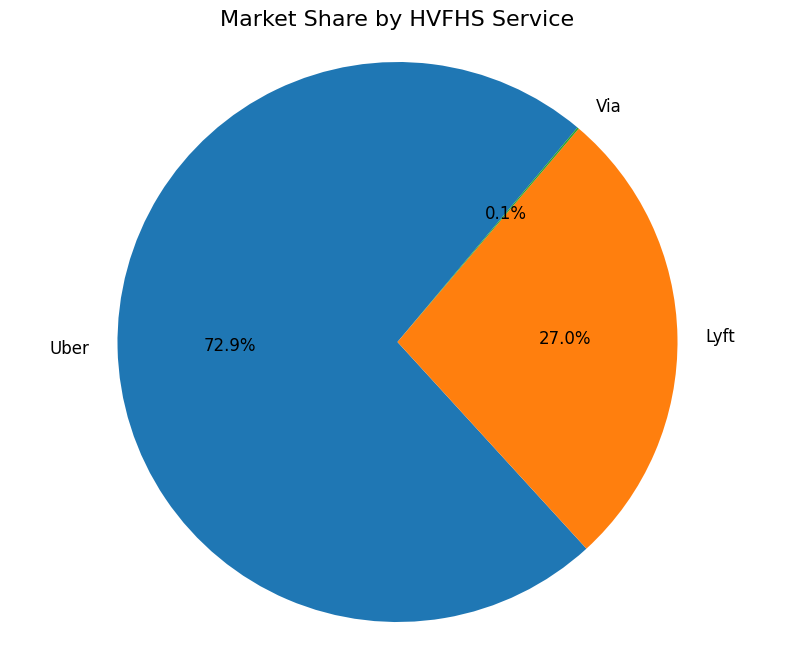

In [35]:
def myFunc(x):
    return hvfhs_license_map.get(x)

plt.figure(figsize=(10, 8))
plt.pie(market_share_df['trip_count'], labels=market_share_df['hvfhs_license_num'].map(myFunc), autopct='%1.1f%%', startangle=50, textprops={'fontsize': 12})
plt.title('Market Share by HVFHS Service', fontsize=16)
plt.axis('equal')
plt.show()

In [ ]:
f"""
WITH calculated_fares AS (
    SELECT
        hvfhs_license_num,
        median((tips / base_passenger_fare) * 100) AS tip_percentage,
        median((base_passenger_fare / trip_miles)) AS revenue_per_mile
    FROM '{high_volume_taxi_path}'
    WHERE base_passenger_fare > 0 AND trip_miles > 0 AND tips >= 0
    group by hvfhs_license_num
"""